In [284]:
from pathlib import Path
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [285]:
path = Path().parent / "data/WB_pop_clean.csv"

In [289]:
data = pd.read_csv(path)
data.isna()

,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,False,False,False,False,False,False,False,False,False,False,False,False,False
214,False,False,False,False,False,False,False,False,False,False,False,False,False
215,False,False,False,False,False,False,False,False,False,False,False,False,False
216,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data["2021"].unique().count()

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [ ]:
data.isnull().any()

Series Name     False
Series Code     False
Country Name    False
Country Code    False
2001            False
2002            False
2003            False
2011            False
2012            False
2013            False
2021            False
2022            False
2023            False
dtype: bool

In [ ]:
for column in data.columns:
    if column.isdigit():
        print(f'For column {column.title()} Min - {data[column].min()}, Max - {data[column].max()}')

For column 2001 Min - 9621, Max - 6226487141
For column 2002 Min - 9609, Max - 6308284566
For column 2003 Min - 9668, Max - 6389592840
For column 2011 Min - 10283, Max - 7053988749
For column 2012 Min - 10444, Max - 7141430933
For column 2013 Min - 10694, Max - 7229458453
For column 2021 Min - 11204, Max - 7888963821
For column 2022 Min - 11312, Max - 7951595433
For column 2023 Min - 11396, Max - 8024997028


In [ ]:
data[data["Country Code"] == "RUS"]

,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
161,"Population, total",SP.POP.TOTL,Russian Federation,RUS,145976482,145306497,144648618,143018195,143378447,143805638,144746762,144236933,143826130


In [ ]:
data[data["Country Code"] == "ESP"]

,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
179,"Population, total",SP.POP.TOTL,Spain,ESP,40850412,41431558,42187645,46742697,46773055,46620045,47415794,47778340,48373336


In [ ]:
def plot_hist_by_year(country_code: str):
    country_data = data[data["Country Code"] == country_code.upper()].select_dtypes(np.number)

    values = country_data.values.flatten().tolist()
    if len(values) == 0:
        raise ValueError(f'No country {country_code}')
    values = [i / 1000000 for i in values]

    years = country_data.columns.to_list()

    print(years)
    print(values)

    plt.title(f'Data for {data[data["Country Code"] == country_code]["Country Name"].iloc[0]} (millions)')
    sns.histplot(x=years, weights=values, kde=True)


['2001', '2002', '2003', '2011', '2012', '2013', '2021', '2022', '2023']
[284.968955, 287.625193, 290.107933, 311.583481, 313.877662, 316.059947, 332.048977, 333.271411, 334.914895]


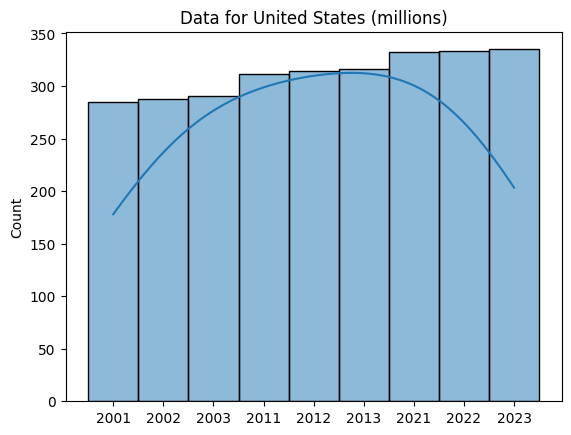

In [ ]:
plot_hist_by_year("USA")

array([[<Axes: title={'center': '2001'}>,
        <Axes: title={'center': '2002'}>,
        <Axes: title={'center': '2003'}>],
       [<Axes: title={'center': '2011'}>,
        <Axes: title={'center': '2012'}>,
        <Axes: title={'center': '2013'}>],
       [<Axes: title={'center': '2021'}>,
        <Axes: title={'center': '2022'}>,
        <Axes: title={'center': '2023'}>]], dtype=object)

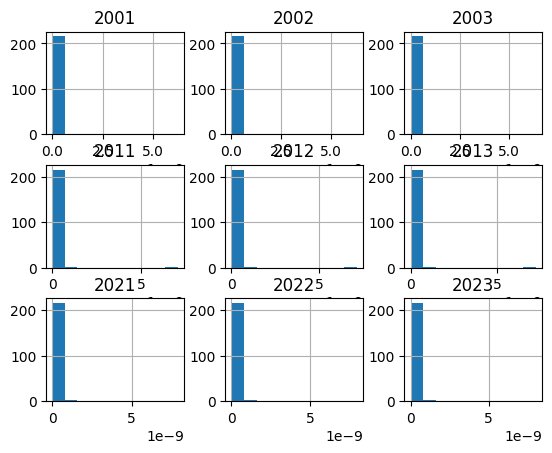

In [ ]:
data = data.select_dtypes(np.number) / 1000000

data.hist()